### COVID-19 
### UPDATE by DAY in the countries: 
#### CHINA, GERMANY, ITALY, KOREA, JAPAN, USA, AUSTRALIA, LUXEMBOURG, UK, CANADA, VIETNAM
#### (Start recorded day: 22.01.2020)

In [1]:
from covid import *
%matplotlib inline

Start importing World-data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/
Start importing USA-data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports_us/
Start importing single data  ./data/COVID-19/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv
Start importing single data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Start importing single data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
Start importing single data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv


In [2]:
len(countries_no_infopopulation)

35

In [3]:
countries_no_infopopulation

['Martinique',
 'Saint Barthelemy',
 'Cape Verde',
 'Gibraltar',
 'Curacao',
 'Republic of Moldova',
 'Aruba',
 'Greenland',
 'Hong Kong',
 'Ivory Coast',
 'Guadeloupe',
 'Channel Islands',
 'Guernsey',
 'occupied Palestinian territory',
 'North Ireland',
 'East Timor',
 'Jersey',
 ' Azerbaijan',
 'Macau',
 'Republic of the Congo',
 'Faroe Islands',
 'St. Martin',
 'Palestine',
 'The Bahamas',
 'Guam',
 'Taipei and environs',
 'The Gambia',
 'Cayman Islands',
 'Vatican City',
 'Reunion',
 'Saint Martin',
 'Mayotte',
 'Puerto Rico',
 'French Guiana',
 'Others_and_ships']

### Number of covid-19 outbreak days 

In [4]:
rcParams['figure.figsize'] = 20, 10
len(data)

459

In [5]:
updated_date=files[-1].split('.')[0]
updated_date

'04-24-2021'

### New cases in the World changed by day

### ARE WE BEATING COVID-19?

The World still has 59021218.0 active cases

In last 7 days:  [57546267. 57693829. 57929229. 58292804. 58542534. 58790462. 59021218.]


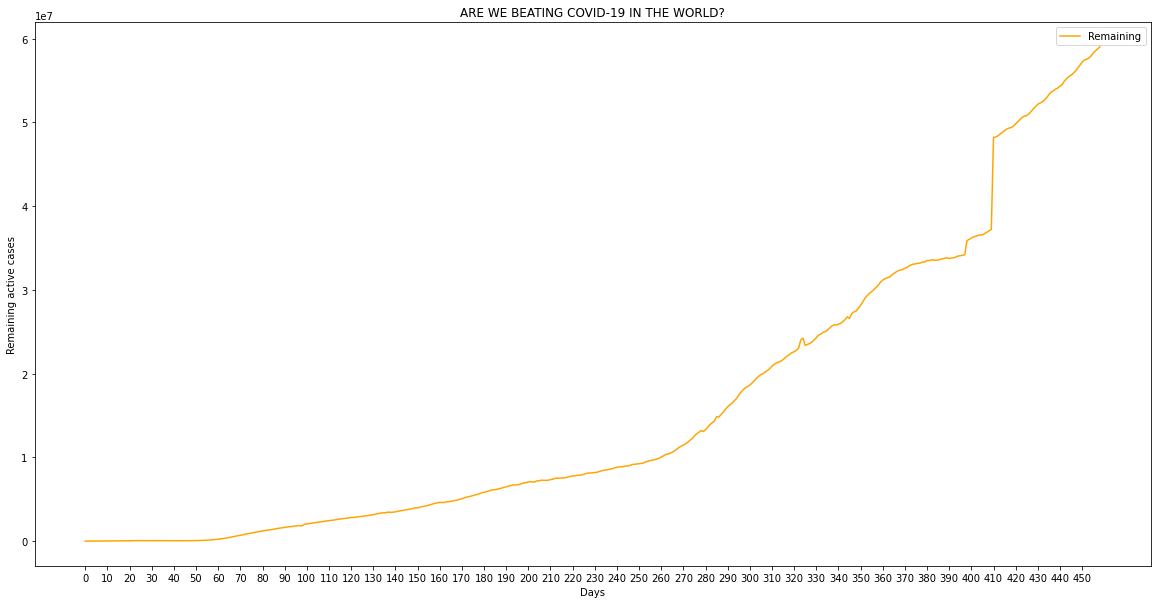

In [6]:
remaining_by_day = np.array(totalconfirmed_by_day) - np.array(totalrecovered_by_day) - np.array(totalfatalities_by_day)

plt.xticks(np.arange(0, max(x_dat)+1, 10))
plt.plot(x_dat, remaining_by_day, color='orange', label='Remaining')
plt.xlabel('Days')
plt.ylabel('Remaining active cases')
plt.title("ARE WE BEATING COVID-19 IN THE WORLD?")
plt.legend()
plt.savefig('output/AreWeBeatingCovid.jpg')
print("The World still has %0.1f active cases\n"% remaining_by_day[-1])
print("In last 7 days: ", remaining_by_day[-7:])

In [7]:
countries_remaining = countries_confirmed-countries_fatalities-countries_recovered
countries_remaining.tail(1)

,Romania,Djibouti,Guinea-Bissau,Switzerland,Martinique,Russia,Bahrain,Saint Barthelemy,Holy See,Micronesia,...,Cyprus,Italy,Mexico,Comoros,Yemen,Suriname,Hungary,Benin,Zimbabwe,Others_and_ships
458,48709.0,353.0,420.0,318315.0,0.0,263270.0,10517.0,0.0,12.0,0.0,...,22217.0,461448.0,263708.0,33.0,2444.0,749.0,262447.0,113.0,1407.0,0.0


In [8]:
daily_confirmed_sum = np.array([sum(countries_confirmed.iloc[i]) for i in range(len(countries_confirmed))])
daily_fatal_sum = np.array([sum(countries_fatalities.iloc[i]) for i in range(len(countries_fatalities))])
daily_recovered_sum = np.array([sum(countries_recovered.iloc[i]) for i in range(len(countries_recovered))])

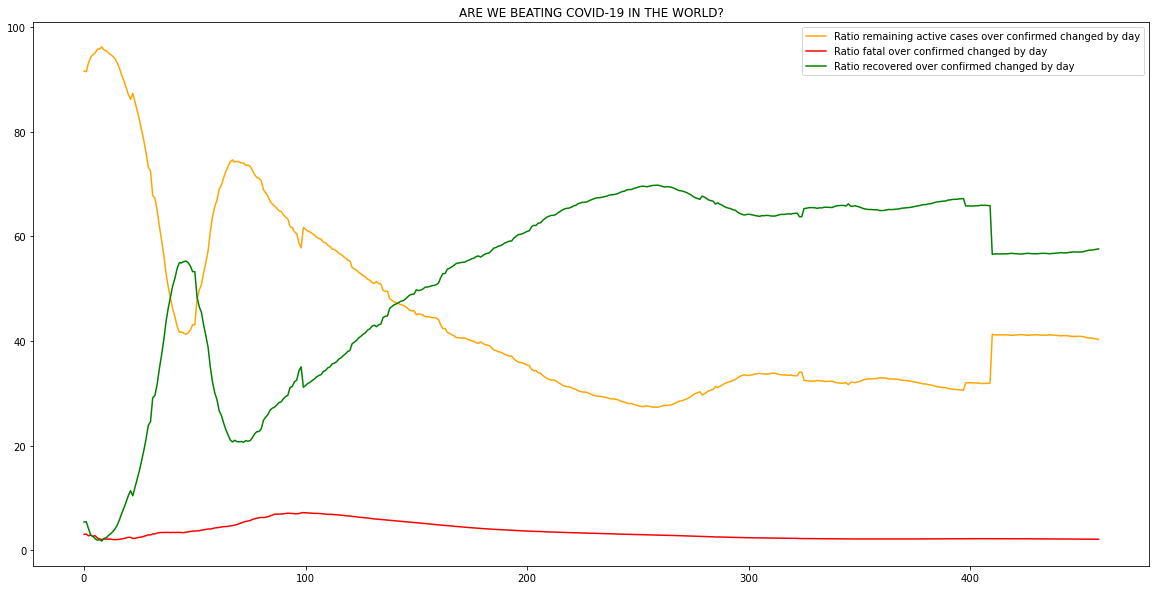

In [9]:
plt.plot(x_dat, ((daily_confirmed_sum-daily_recovered_sum-daily_fatal_sum)/daily_confirmed_sum)*100, color='orange', label='Ratio remaining active cases over confirmed changed by day')
plt.plot(x_dat, (daily_fatal_sum/daily_confirmed_sum)*100, color='red', label='Ratio fatal over confirmed changed by day')
plt.plot(x_dat, (daily_recovered_sum/daily_confirmed_sum)*100, color='green', label='Ratio recovered over confirmed changed by day')
plt.title("ARE WE BEATING COVID-19 IN THE WORLD?")
plt.legend()
plt.savefig('output/AreWeBeatingCovid_ratio.jpg')

### Countries are beating COVID most

,458
Others_and_ships,0.0
Aruba,0.0
Greenland,0.0
Hong Kong,0.0
Ivory Coast,0.0
Mayotte,0.0
Saint Martin,0.0
Guadeloupe,0.0
Channel Islands,0.0
Guernsey,0.0


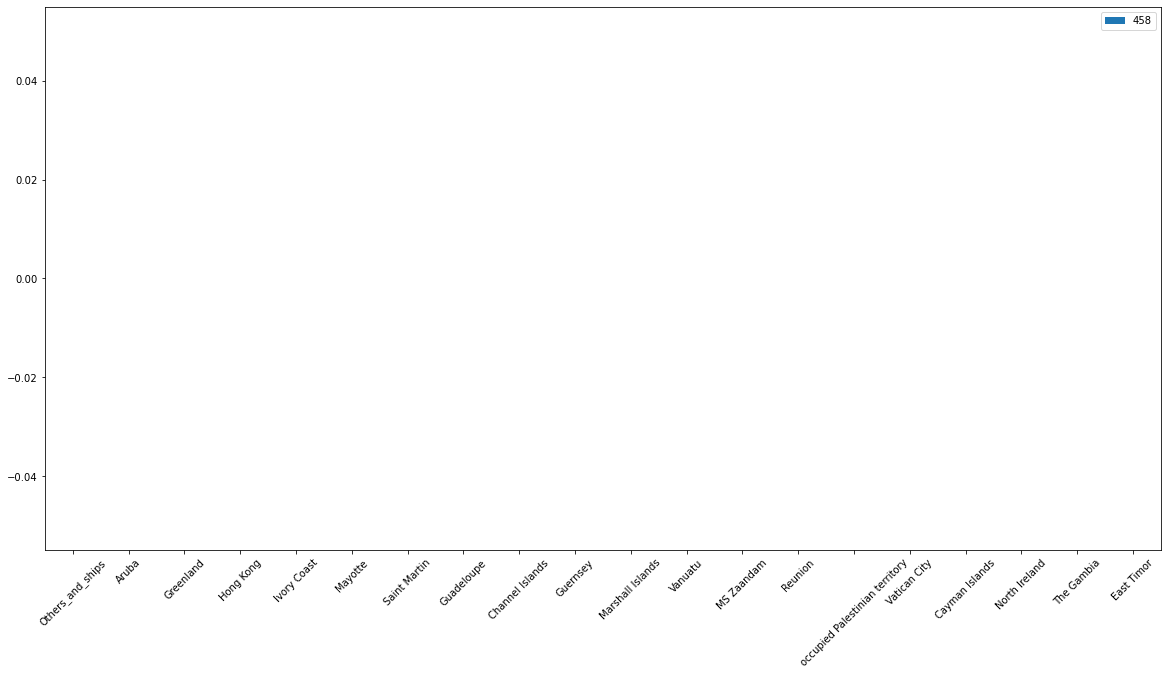

In [10]:
index = countries_remaining.tail(1)
top_remaining = countries_remaining.tail(1).transpose().sort_values(by=index.index[0], ascending=True).head(20)
top_remaining.plot(kind='bar')
plt.xticks(rotation=45)
top_remaining

,Others_and_ships,Aruba,Greenland,Hong Kong,Ivory Coast,Mayotte,Saint Martin,Guadeloupe,Channel Islands,Guernsey,Marshall Islands,Vanuatu,MS Zaandam,Reunion,occupied Palestinian territory,Vatican City,Cayman Islands,North Ireland,The Gambia,East Timor
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


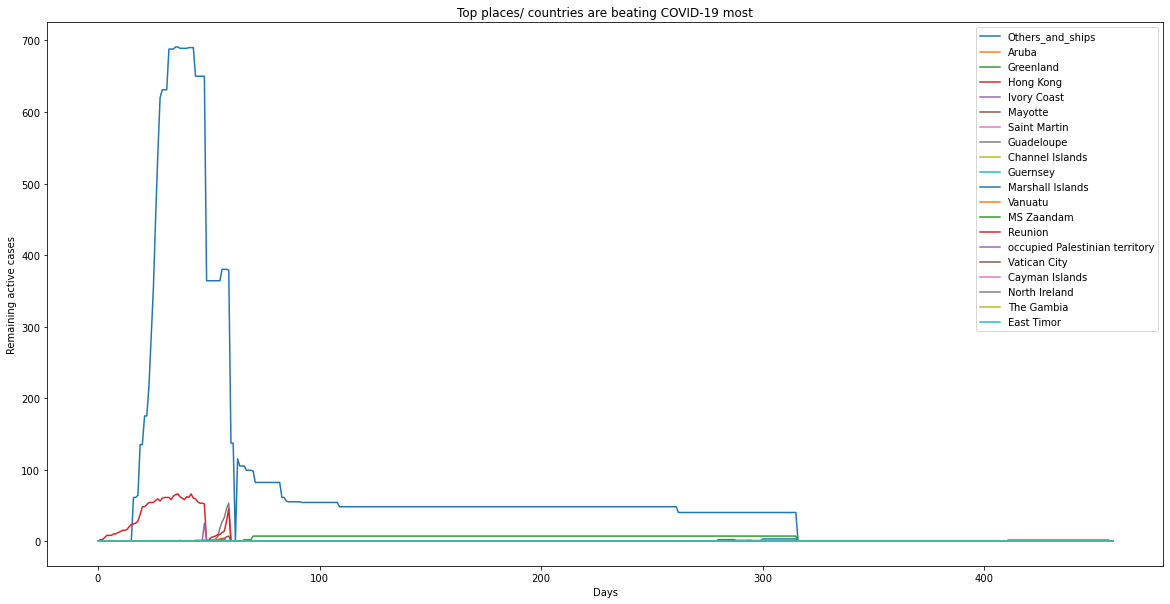

In [11]:
countries_remaining[top_remaining.index].plot()
plt.xlabel('Days')
plt.ylabel('Remaining active cases')
plt.title("Top places/ countries are beating COVID-19 most")
countries_remaining[top_remaining.index]

### Countries are beating COVID least

,458
US,31473192.0
France,5094117.0
United Kingdom,4276652.0
Spain,3240650.0
India,2682751.0
Netherlands,1437905.0
Brazil,1312712.0
Belgium,948051.0
Sweden,924420.0
Serbia,671776.0


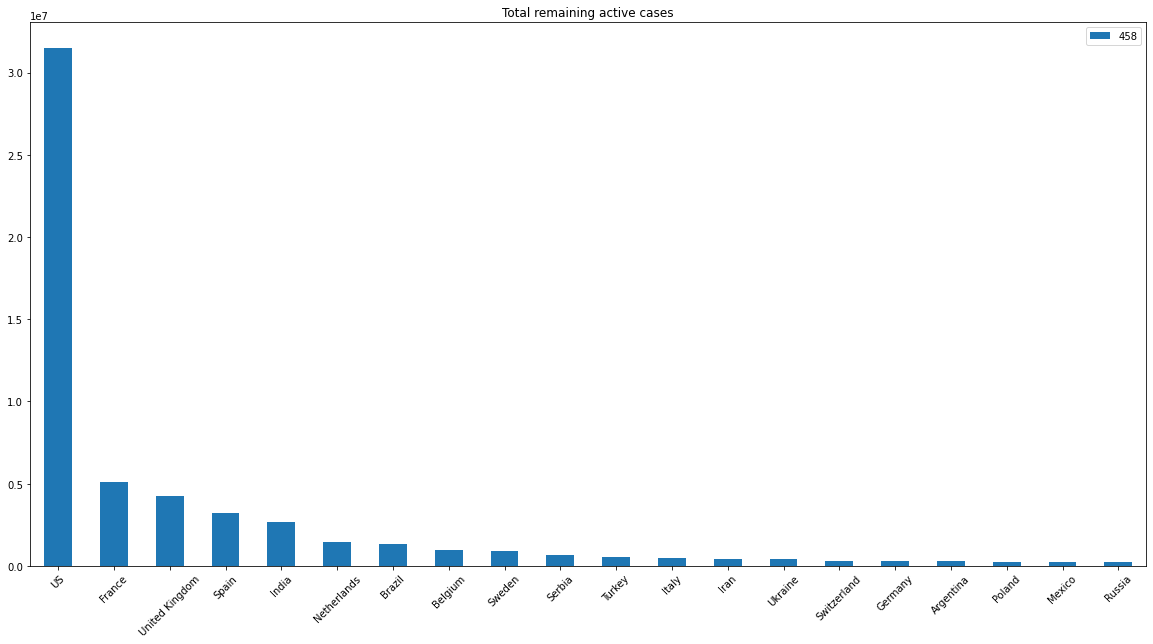

In [12]:
bottom_remaining = countries_remaining.tail(1).transpose().sort_values(by=index.index[0], ascending=False).head(20)
bottom_remaining.plot(kind='bar')
plt.title("Total remaining active cases")
plt.xticks(rotation=45)
bottom_remaining

Text(0.5, 1.0, 'Top places/ countries are beating COVID-19 least')

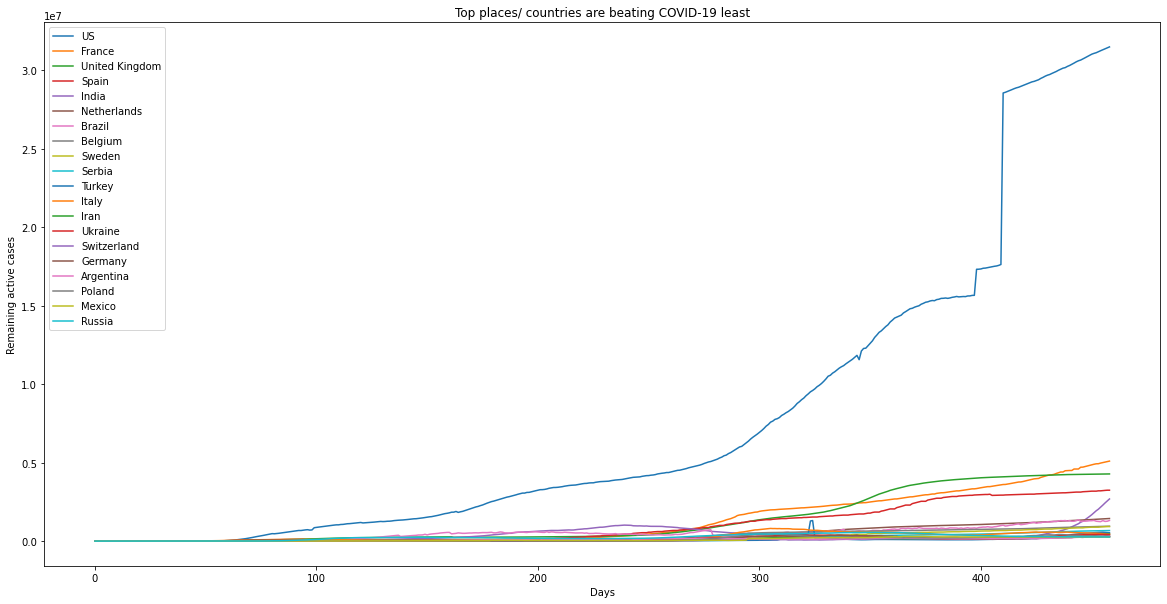

In [13]:
countries_remaining[bottom_remaining.index].plot()
plt.xlabel('Days')
plt.ylabel('Remaining active cases')
plt.title("Top places/ countries are beating COVID-19 least")

#### The current remaining days is not included with the recovered data from US. 
#### See: https://github.com/CSSEGISandData/COVID-19/issues/3464